<a href="https://colab.research.google.com/github/sharibhumayun/Logic2.0/blob/main/Communication%3A%20Base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt

In [ ]:
path = 'https://raw.githubusercontent.com/sharibhumayun/Logic2.0/main/MasterDatabase.csv'

df = pd.read_csv(path)
df.head()

,Current_connection,City,Region,Nationality,Gender,Exact_Age,Connection,Segment,Performance,Preference,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Website_performance,Mobileapp_satisfaction,Performance_SNS_Promotions
0,Mobily,JEDDAH,Western,Nationals,Female,23.0,Prepaid,LV,5.0,4.0,125,0.0,10.0,NaN,10.0,10.0,NaN,10.0,NaN,NaN,NaN
1,Mobily,JEDDAH,Western,Expat Asians,Male,35.0,Prepaid,VLV,5.0,5.0,150,5.0,7.0,NaN,8.0,9.0,NaN,10.0,NaN,NaN,NaN
2,Mobily,MAKKAH AL MUKARRAMAH,Western,Expat Asians,Male,32.0,Prepaid,VLV,3.0,3.0,50,5.0,3.0,NaN,NaN,7.0,NaN,10.0,NaN,NaN,NaN
3,Mobily,AR RIYADH,Central,Nationals,Male,31.0,Postpaid,VHV,2.0,1.0,-25,5.0,4.0,NaN,5.0,4.0,4.0,6.0,5.0,5.0,NaN
4,Mobily,KHAMIS MUSHAYT,South,Expat Arabs,Male,16.0,Prepaid,HV,5.0,5.0,150,10.0,10.0,NaN,10.0,10.0,NaN,10.0,NaN,NaN,NaN


In [ ]:
df.shape

(29072, 21)

**Data** **Preprocessing**

In [ ]:
df.isnull().sum()

Current_connection                0
City                              0
Region                            0
Nationality                       0
Gender                            0
Exact_Age                        66
Connection                        0
Segment                           0
Performance                      98
Preference                      561
TRIM_Index                        0
Communication                  1301
Proposition                     652
Sales_Experience              28085
Opt_inout                       950
Network_Satisfaction            115
Customer_Support              19914
Billing_Payment                 812
Website_performance           19448
Mobileapp_satisfaction        18435
Performance_SNS_Promotions    23878
dtype: int64

In [ ]:
df.dtypes

Current_connection             object
City                           object
Region                         object
Nationality                    object
Gender                         object
Exact_Age                     float64
Connection                     object
Segment                        object
Performance                   float64
Preference                    float64
TRIM_Index                      int64
Communication                 float64
Proposition                   float64
Sales_Experience              float64
Opt_inout                     float64
Network_Satisfaction          float64
Customer_Support              float64
Billing_Payment               float64
Website_performance           float64
Mobileapp_satisfaction        float64
Performance_SNS_Promotions    float64
dtype: object

In [ ]:
# Insert the missing values with the median of each column
df['Exact_Age'] = df['Exact_Age'].fillna(value = df['Exact_Age'].median())
df['Performance'] = df['Performance'].fillna(value = df['Performance'].median())
df['Preference'] = df['Preference'].fillna(value = df['Preference'].median())
df['Communication'] = df['Communication'].fillna(value = df['Communication'].median())
df['Proposition'] = df['Proposition'].fillna(value = df['Proposition'].median())
df['Sales_Experience'] = df['Sales_Experience'].fillna(value = df['Sales_Experience'].median())
df['Opt_inout'] = df['Opt_inout'].fillna(value = df['Opt_inout'].median())
df['Network_Satisfaction'] = df['Network_Satisfaction'].fillna(value = df['Network_Satisfaction'].median())
df['Customer_Support'] = df['Customer_Support'].fillna(value = df['Customer_Support'].median())
df['Billing_Payment'] = df['Billing_Payment'].fillna(value = df['Billing_Payment'].median())
df['Website_performance'] = df['Website_performance'].fillna(value = df['Website_performance'].median())
df['Mobileapp_satisfaction'] = df['Mobileapp_satisfaction'].fillna(value = df['Mobileapp_satisfaction'].median())
df['Performance_SNS_Promotions'] = df['Performance_SNS_Promotions'].fillna(value = df['Performance_SNS_Promotions'].median())



In [ ]:
df.isnull().sum()

Current_connection            0
City                          0
Region                        0
Nationality                   0
Gender                        0
Exact_Age                     0
Connection                    0
Segment                       0
Performance                   0
Preference                    0
TRIM_Index                    0
Communication                 0
Proposition                   0
Sales_Experience              0
Opt_inout                     0
Network_Satisfaction          0
Customer_Support              0
Billing_Payment               0
Website_performance           0
Mobileapp_satisfaction        0
Performance_SNS_Promotions    0
dtype: int64

In [ ]:
# Insert new column Digital_performance taking the average of Website, Mobile app and Social media satisfaction
df['Digital_performance'] = df[['Performance_SNS_Promotions', 'Mobileapp_satisfaction','Website_performance']].mean(axis = 1).round()

In [ ]:
df.head()

,Current_connection,City,Region,Nationality,Gender,Exact_Age,Connection,Segment,Performance,Preference,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Website_performance,Mobileapp_satisfaction,Performance_SNS_Promotions,Digital_performance
0,Mobily,JEDDAH,Western,Nationals,Female,23.0,Prepaid,LV,5.0,4.0,125,0.0,10.0,10.0,10.0,10.0,10.0,10.0,8.0,10.0,9.0,9.0
1,Mobily,JEDDAH,Western,Expat Asians,Male,35.0,Prepaid,VLV,5.0,5.0,150,5.0,7.0,10.0,8.0,9.0,10.0,10.0,8.0,10.0,9.0,9.0
2,Mobily,MAKKAH AL MUKARRAMAH,Western,Expat Asians,Male,32.0,Prepaid,VLV,3.0,3.0,50,5.0,3.0,10.0,9.0,7.0,10.0,10.0,8.0,10.0,9.0,9.0
3,Mobily,AR RIYADH,Central,Nationals,Male,31.0,Postpaid,VHV,2.0,1.0,-25,5.0,4.0,10.0,5.0,4.0,4.0,6.0,5.0,5.0,9.0,6.0
4,Mobily,KHAMIS MUSHAYT,South,Expat Arabs,Male,16.0,Prepaid,HV,5.0,5.0,150,10.0,10.0,10.0,10.0,10.0,10.0,10.0,8.0,10.0,9.0,9.0


In [ ]:
print(df['Current_connection'].unique())
print(df['Region'].unique())
print(df['Nationality'].unique())
print(df['Gender'].unique())
print(df['Connection'].unique())
print(df['Segment'].unique())

['Mobily' 'Lebara' 'Friendi' 'Virgin' 'Jawwy' 'STC' 'Zain']
['Western' 'Central' 'South' 'Others' 'Northern' 'Eastern']
['Nationals' 'Expat Asians' 'Expat Arabs']
['Female' 'Male']
['Prepaid' 'Postpaid' 'PostpaidData' 'PrepaidData']
['LV' 'VLV' 'VHV' 'HV' 'MV' 'Data']


In [ ]:
# Drop City as Region is already included
df.drop(['City'],axis = 1, inplace = True)

In [ ]:
df.head()

,Current_connection,Region,Nationality,Gender,Exact_Age,Connection,Segment,Performance,Preference,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Website_performance,Mobileapp_satisfaction,Performance_SNS_Promotions,Digital_performance
0,Mobily,Western,Nationals,Female,23.0,Prepaid,LV,5.0,4.0,125,0.0,10.0,10.0,10.0,10.0,10.0,10.0,8.0,10.0,9.0,9.0
1,Mobily,Western,Expat Asians,Male,35.0,Prepaid,VLV,5.0,5.0,150,5.0,7.0,10.0,8.0,9.0,10.0,10.0,8.0,10.0,9.0,9.0
2,Mobily,Western,Expat Asians,Male,32.0,Prepaid,VLV,3.0,3.0,50,5.0,3.0,10.0,9.0,7.0,10.0,10.0,8.0,10.0,9.0,9.0
3,Mobily,Central,Nationals,Male,31.0,Postpaid,VHV,2.0,1.0,-25,5.0,4.0,10.0,5.0,4.0,4.0,6.0,5.0,5.0,9.0,6.0
4,Mobily,South,Expat Arabs,Male,16.0,Prepaid,HV,5.0,5.0,150,10.0,10.0,10.0,10.0,10.0,10.0,10.0,8.0,10.0,9.0,9.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

df= df.apply(LabelEncoder().fit_transform)
df.head()

,Current_connection,Region,Nationality,Gender,Exact_Age,Connection,Segment,Performance,Preference,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Website_performance,Mobileapp_satisfaction,Performance_SNS_Promotions,Digital_performance
0,3,5,2,0,8,2,2,4,3,7,0,10,10,10,10,10,10,7,9,8,8
1,3,5,1,1,20,2,5,4,4,8,5,7,10,8,9,10,10,7,9,8,8
2,3,5,1,1,17,2,5,2,2,4,5,3,10,9,7,10,10,7,9,8,8
3,3,0,2,1,16,0,4,1,0,1,5,4,10,5,4,4,6,4,4,8,5
4,3,4,0,1,1,2,1,4,4,8,10,10,10,10,10,10,10,7,9,8,8


In [ ]:
df.drop(['Website_performance','Mobileapp_satisfaction', 'Performance_SNS_Promotions'], axis = 1, inplace = True)

In [ ]:
df.head()

,Current_connection,Region,Nationality,Gender,Exact_Age,Connection,Segment,Performance,Preference,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Digital_performance
0,3,5,2,0,8,2,2,4,3,7,0,10,10,10,10,10,10,8
1,3,5,1,1,20,2,5,4,4,8,5,7,10,8,9,10,10,8
2,3,5,1,1,17,2,5,2,2,4,5,3,10,9,7,10,10,8
3,3,0,2,1,16,0,4,1,0,1,5,4,10,5,4,4,6,5
4,3,4,0,1,1,2,1,4,4,8,10,10,10,10,10,10,10,8


In [ ]:
dict = {0: -50, 1: -25, 2: 0, 3: 25, 4: 50, 5: 75, 6: 100, 7: 125, 8: 150}

print(dict)
df['TRIM_Index']= df['TRIM_Index'].map(dict)

{0: -50, 1: -25, 2: 0, 3: 25, 4: 50, 5: 75, 6: 100, 7: 125, 8: 150}


In [ ]:
df.head()

,Current_connection,Region,Nationality,Gender,Exact_Age,Connection,Segment,Performance,Preference,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Digital_performance
0,3,5,2,0,8,2,2,4,3,125,0,10,10,10,10,10,10,8
1,3,5,1,1,20,2,5,4,4,150,5,7,10,8,9,10,10,8
2,3,5,1,1,17,2,5,2,2,50,5,3,10,9,7,10,10,8
3,3,0,2,1,16,0,4,1,0,-25,5,4,10,5,4,4,6,5
4,3,4,0,1,1,2,1,4,4,150,10,10,10,10,10,10,10,8


In [ ]:
from sklearn.preprocessing import StandardScaler
object = StandardScaler()
df=object.fit_transform(df)
print (df)


[[-0.69461266  1.32980038  0.70421271 ...  0.75007049  0.24151021
   0.68540296]
 [-0.69461266  1.32980038 -0.44847418 ...  0.75007049  0.24151021
   1.15933586]
 [-0.69461266  1.32980038 -0.44847418 ...  0.75007049  0.24151021
  -0.73639574]
 ...
 [ 1.88683177 -1.13604115 -1.60116108 ... -3.04044008 -2.78790944
   0.21147006]
 [ 1.88683177  0.83663207 -1.60116108 ...  0.75007049  0.24151021
   1.15933586]
 [ 1.88683177  1.32980038 -1.60116108 ... -0.00803163  0.24151021
   1.15933586]]


**Identification of Outliers**

In [ ]:
from scipy.stats import zscore
df['zscore_TRIM'] = zscore(df.TRIM_Index)
df.head()

AttributeError: ignored

In [ ]:
df[(df.zscore_TRIM> 3) | (df.zscore_TRIM < -3)]

,Current_connection,Region,Nationality,Gender,Exact_Age,Connection,Segment,Performance,Preference,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Digital_performance,zscore_TRIM


{'boxes': [<matplotlib.lines.Line2D at 0x7fc1b37d3780>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc1b37611d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc1b3761c50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc1b37618d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc1b37d3a90>,
  <matplotlib.lines.Line2D at 0x7fc1b37d3e10>]}

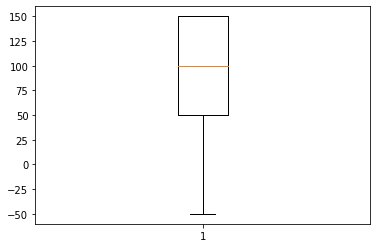

In [ ]:
plt.boxplot(df.TRIM_Index)

In [ ]:
## No outliers are identified so, we will proceed with the full dataset

**Check for Multicollinearity**`

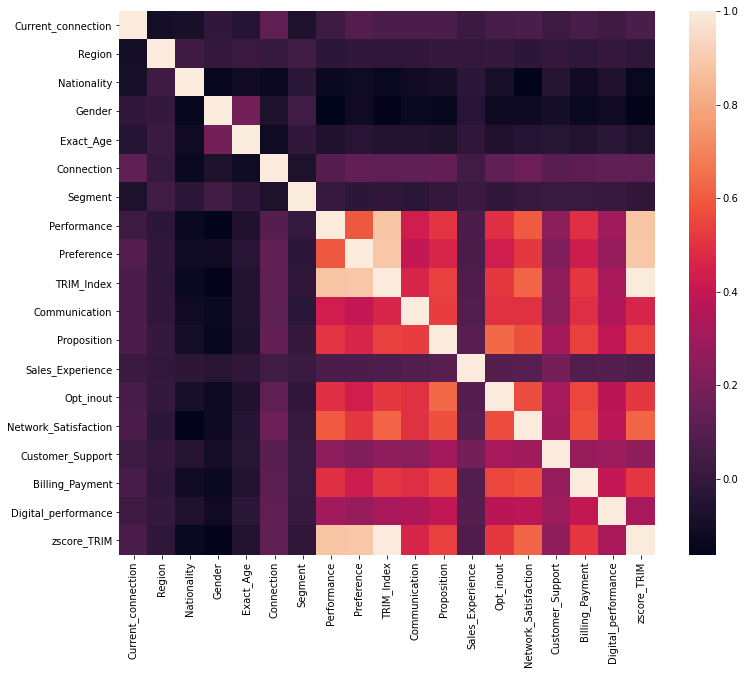

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr())

In [ ]:
df_mobily = df[df['Current_connection']==3]

In [ ]:
df_mobily.head()

,Current_connection,Region,Nationality,Gender,Exact_Age,Connection,Segment,Performance,Preference,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Digital_performance,zscore_TRIM
0,3,5,2,0,8,2,2,4,3,125,0,10,10,10,10,10,10,8,0.685403
1,3,5,1,1,20,2,5,4,4,150,5,7,10,8,9,10,10,8,1.159336
2,3,5,1,1,17,2,5,2,2,50,5,3,10,9,7,10,10,8,-0.736396
3,3,0,2,1,16,0,4,1,0,-25,5,4,10,5,4,4,6,5,-2.158194
4,3,4,0,1,1,2,1,4,4,150,10,10,10,10,10,10,10,8,1.159336


In [ ]:
df_mobily.shape

(14570, 19)

In [ ]:
df_mobily.drop(['Exact_Age','Performance', 'Preference'],axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_mobily.head()

,Current_connection,Region,Nationality,Gender,Connection,Segment,TRIM_Index,Communication,Proposition,Sales_Experience,Opt_inout,Network_Satisfaction,Customer_Support,Billing_Payment,Digital_performance,zscore_TRIM
0,3,5,2,0,2,2,125,0,10,10,10,10,10,10,8,0.685403
1,3,5,1,1,2,5,150,5,7,10,8,9,10,10,8,1.159336
2,3,5,1,1,2,5,50,5,3,10,9,7,10,10,8,-0.736396
3,3,0,2,1,0,4,-25,5,4,10,5,4,4,6,5,-2.158194
4,3,4,0,1,2,1,150,10,10,10,10,10,10,10,8,1.159336


Check for Multi colinearity

In [ ]:
df_mobily_x= df_mobily.drop('TRIM_Index',axis =1)

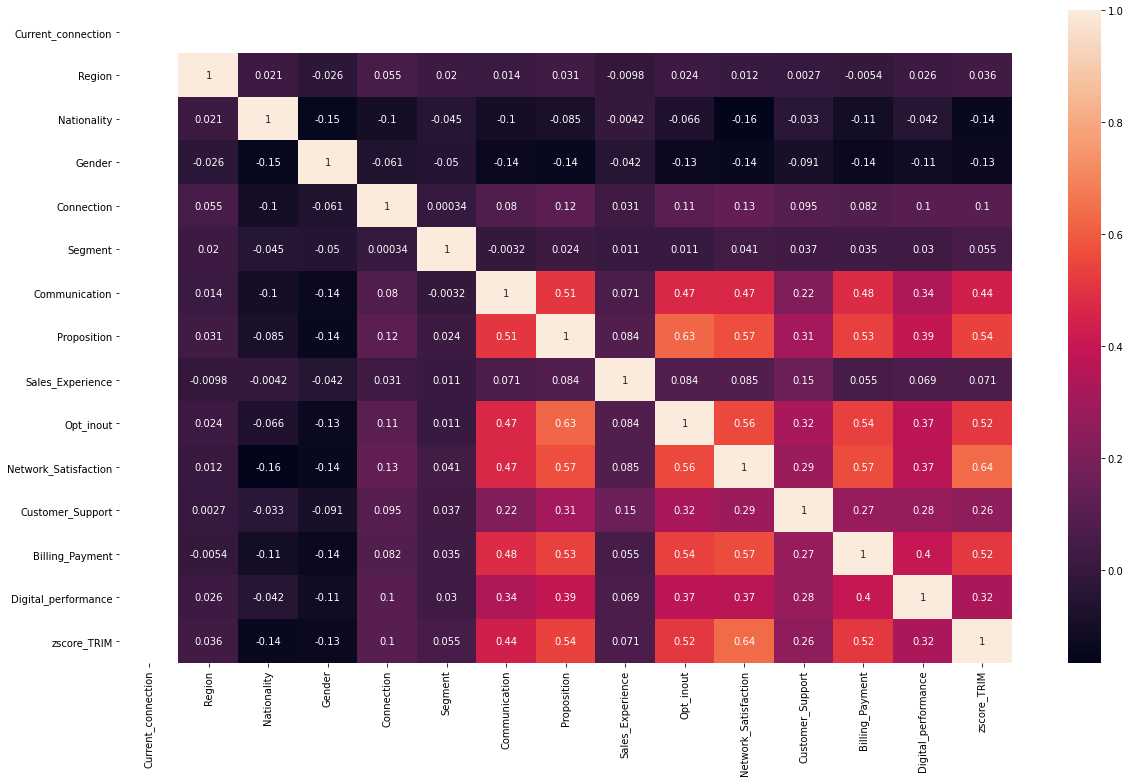

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df_mobily_x.corr(), annot = True)

**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
x = df_mobily_x
y= df_mobily['TRIM_Index']

In [ ]:
lr = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 5)

In [ ]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred= lr.predict(x_test)
y_pred

array([150.,  75., -25., ..., 125.,  50., 125.])

In [ ]:
y_test

1464     150
6376      75
15934    -25
19200     25
13081    150
        ... 
18744    150
10333    150
15342    125
13230     50
25988    125
Name: TRIM_Index, Length: 4371, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lr.score(x_test,y_test)

1.0

In [ ]:
mse= mean_squared_error(y_pred,y_test)
print(mse)

1.947697755466749e-27


In [ ]:
from sklearn import metrics

np.sqrt(metrics.mean_squared_error(y_pred, y_test))

4.413272884681786e-14

In [ ]:
np.round(metrics.r2_score(y_pred, y_test),2)

1.0

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


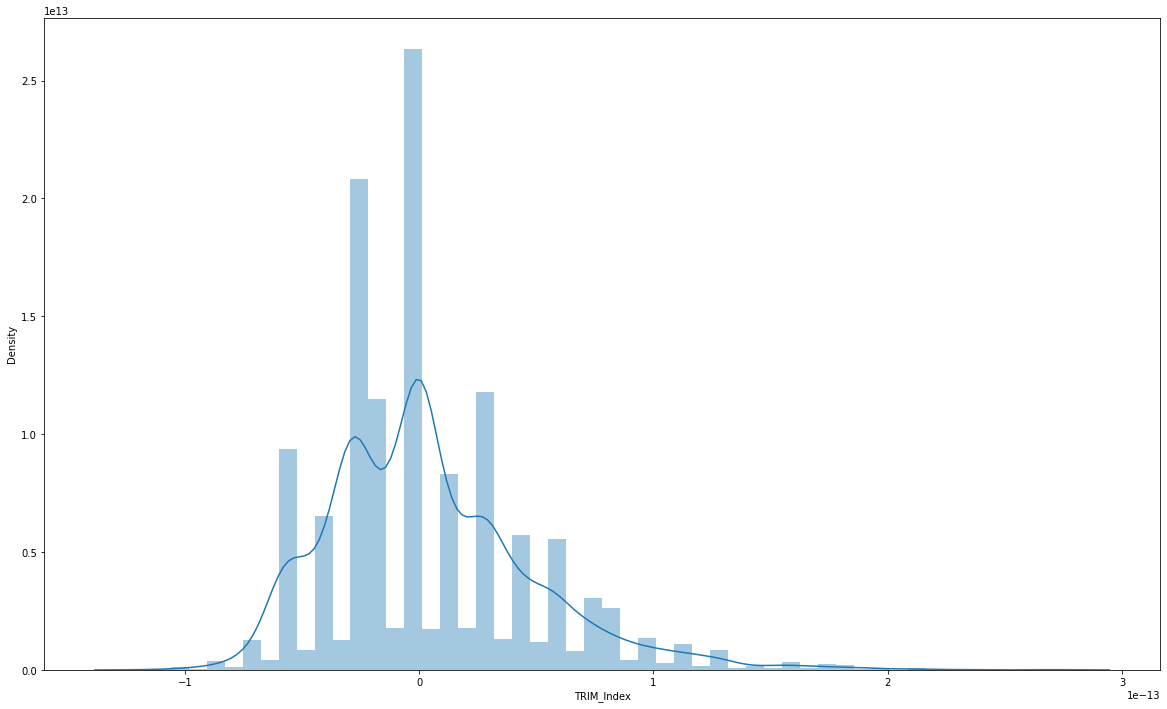

In [ ]:
plt.figure(figsize=(20,12))
sns.distplot(y_test - y_pred)

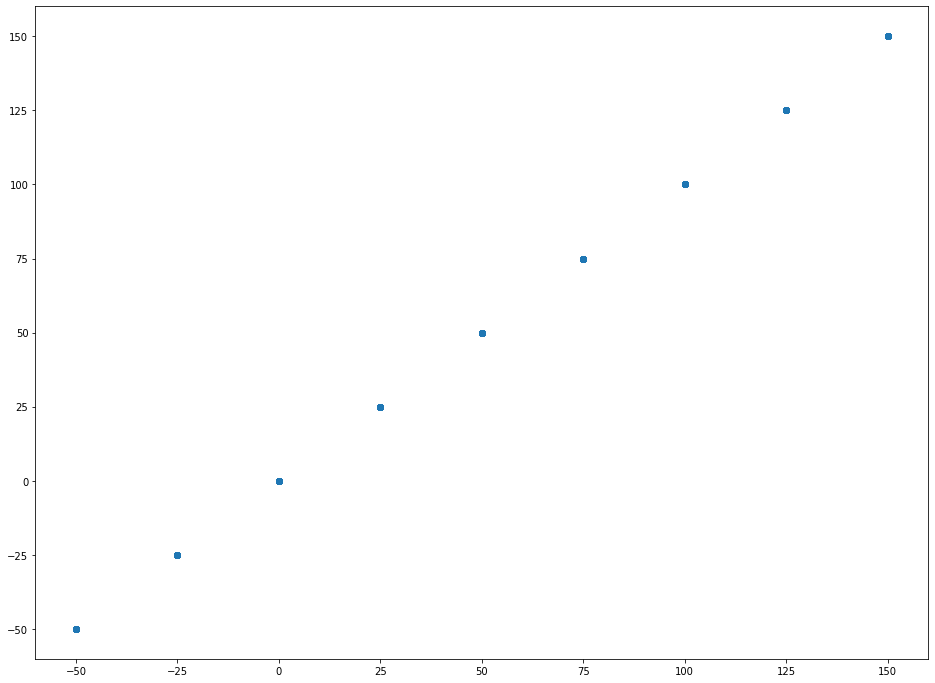

In [ ]:
plt.figure(figsize=(16,12))
plt.scatter(y_test, y_pred)


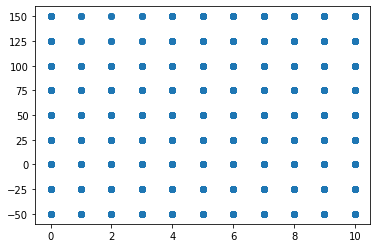

In [ ]:
plt.scatter (x= df_mobily['Proposition'], y = df_mobily['TRIM_Index'])

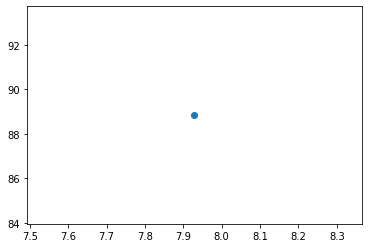

In [ ]:
plt.scatter (x= df['Network_Satisfaction'].mean(), y = df['TRIM_Index'].mean())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


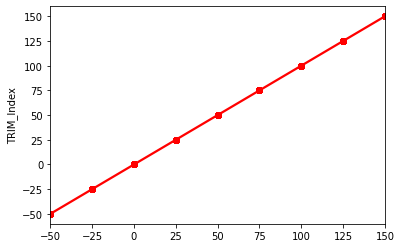

In [ ]:
sns.regplot(y_pred,y_test, data = df_mobily, color='r')

In [ ]:
!pip install relativeimp

In [ ]:
from relativeImp import relativeImp

In [ ]:
df_mobily.columns

Index(['Current_connection', 'Region', 'Nationality', 'Gender', 'Connection',
       'Segment', 'TRIM_Index', 'Communication', 'Proposition',
       'Sales_Experience', 'Opt_inout', 'Network_Satisfaction',
       'Customer_Support', 'Billing_Payment', 'Digital_performance',
       'zscore_TRIM'],
      dtype='object')

In [ ]:
xNames = ['Communication','Proposition', 'Sales_Experience','Opt_inout','Network_Satisfaction', 'Customer_Support','Billing_Payment', 'Digital_performance']
yName = 'TRIM_Index'

df_results = relativeImp(df_mobily, outcomeName = yName, driverNames = xNames)
df_results

,driver,rawRelaImpt,normRelaImpt
0,Communication,0.048280,10.039567
1,Proposition,0.082035,17.058690
2,Sales_Experience,0.000978,0.203358
3,Opt_inout,0.070087,14.574242
4,Network_Satisfaction,0.168849,35.111107
5,Customer_Support,0.014050,2.921699
6,Billing_Payment,0.074605,15.513670
7,Digital_performance,0.022014,4.577667


In [ ]:
lr.coef_

array([ 0.00000000e+00,  6.21724894e-15,  9.93649607e-15,  6.89726054e-15,
        9.93649607e-15,  2.22044605e-16,  3.38618023e-15, -1.66533454e-15,
       -1.40512602e-15,  7.32747196e-15,  3.44169138e-15, -4.94049246e-15,
        4.32986980e-15,  1.86517468e-14,  5.27500835e+01])

In [ ]:
lr.intercept_

88.84493670886049